Question 2 [10 marks]

In the spike_trains folder you will find the data file rho.dat. This is con- tains data collected and provided by Rob de Ruyter van Steveninck from a fly H1 neuron responding to an approximate white-noise visual motion stimu- lus. Data were collected for 20 minutes at a sampling rate of 500 Hz. In the file, rho is a vector that gives the sequence of spiking events or non-events at the sampled time, that is, every 2 ms.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Fano factor
def calculate_fano_factor(spike_times, window_sizes, duration):
    fano_factors = {}
    for window_size in window_sizes:
        bins = np.arange(0, duration, window_size)
        spike_counts, _ = np.histogram(spike_times, bins)
        variance = np.var(spike_counts)
        mean = np.mean(spike_counts)
        fano_factors[window_size] = variance / mean if mean > 0 else np.nan
    return fano_factors

# Function to calculate ISI Coefficient of Variation
def calculate_isi_cv(spike_times):
    isi = np.diff(spike_times)
    cv = np.std(isi) / np.mean(isi) if np.mean(isi) > 0 else np.nan
    return cv

(i) Calculate the Fano factor and coefficient of variation for this spike train as for the simulated spike trains above (also exploring 10 ms, 50 ms, 100 ms bin size).

Fano Factors for different window sizes (seconds):
Window Size: 10 ms, Fano Factor: 1.1177
Window Size: 50 ms, Fano Factor: 2.9317
Window Size: 100 ms, Fano Factor: 4.1055

ISI Coefficient of Variation (CV): 2.0086


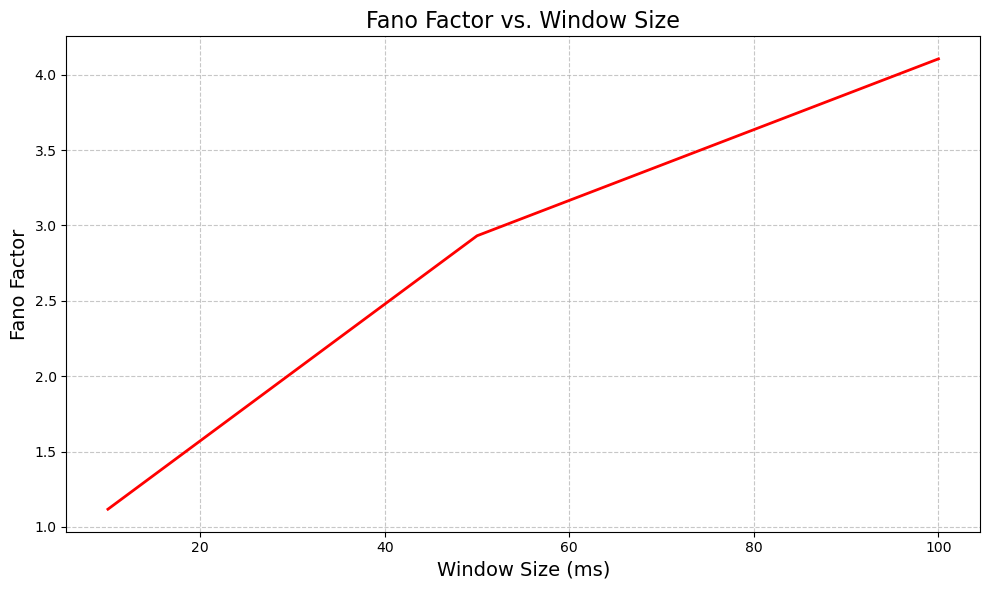

In [5]:
# Load the spike train data
rho = np.loadtxt("rho.dat")  # Replace with the full path to rho.dat if necessary

# Extract spike times from the binary vector
sampling_interval = 2 / 1000  # 2 ms sampling interval in seconds
spike_times = np.where(rho == 1)[0] * sampling_interval  # Convert indices to time in seconds
duration = len(rho) * sampling_interval  # Total duration of the spike train in seconds

# Define window sizes in seconds (10 ms, 50 ms, 100 ms)
window_sizes = [0.01, 0.05, 0.1]

# Calculate Fano Factors for different window sizes
fano_factors = calculate_fano_factor(spike_times, window_sizes, duration)

# Calculate ISI Coefficient of Variation
isi_cv = calculate_isi_cv(spike_times)

# Display results
print("Fano Factors for different window sizes (seconds):")
for window_size, fano in fano_factors.items():
    print(f"Window Size: {window_size * 1000:.0f} ms, Fano Factor: {fano:.4f}")

print(f"\nISI Coefficient of Variation (CV): {isi_cv:.4f}")

def plot_results(fano_factors, window_sizes):
    """
    Creates a line chart for Fano factors across window sizes.
    """
    window_labels = [w * 1000 for w in window_sizes]  # Convert to ms for labels
    fano_values = [fano_factors[w] for w in window_sizes]

    # Line chart for Fano Factor Across Window Sizes
    plt.figure(figsize=(10, 6))
    plt.plot(window_labels, fano_values, color="red", linestyle="-", linewidth=2)
    plt.title("Fano Factor vs. Window Size", fontsize=16)
    plt.ylabel("Fano Factor", fontsize=14)
    plt.xlabel("Window Size (ms)", fontsize=14)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot the results
plot_results(fano_factors, window_sizes)

(ii) Does the spike train exhibit more variability or less variability than you’d expect for a homogeneous Poisson process? How is this reflected in the count Fano factor and ISI coefficient of variation? Conjecture on why the data may deviate from a homogeneous Poisson process in this experiment. (25-100 words)

The spike train exhibits more variability than expected for a homogeneous Poisson process. This is reflected in the Fano Factor being greater than 1 (e.g., 4.1 for 100 ms bins), indicating higher count variability. Similarly, the ISI Coefficient of Variation (CV) is approximately 2.0, which exceeds the value of 1 expected for a homogeneous Poisson process.

Possible Reasons for Deviation:
Temporal Modulations: The stimulus (white-noise motion) might induce time-varying firing rates, making the process inhomogeneous.
Neural Adaptation: Variability may arise due to intrinsic neural properties or adaptation mechanisms.
Input Correlations: The neuron might receive input with correlated or bursty activity rather than independent Poisson-like inputs.